In [226]:
import numpy as np
import os
import matplotlib.pyplot as plt
import skvideo.io
import cv2
from scipy import ndimage

In [227]:
#Change current working directory
imagePath = "C:/Users/antonkout/Documents/Publications/paper/synchronized/new"
os.chdir(imagePath)

In [228]:
rgb_mix1_sync = skvideo.io.vread("./rgb_mix1_sync.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
thermal_mix1_sync = skvideo.io.vread("./thermal_mix1_sync.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]

In [229]:
rgb_bgr = np.load('C:/Users/antonkout/Documents/Publications/paper/synchronized/new/code/rgb_background_initialization_img.npy')
thm_bgr = np.load('C:/Users/antonkout/Documents/Publications/paper/synchronized/new/code/thermal_background_initialization_img.npy')

In [230]:
def background_sub_MOG2(in_vid, out_vid):
    cap = cv2.VideoCapture(in_vid)
    subtractor = cv2.createBackgroundSubtractorMOG2(history=25, varThreshold=50, detectShadows=True)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    size = (int(cap.get(3)),int(cap.get(4))) 
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(out_vid, fourcc, 25.0, size, isColor=0)

    while True:
        _, frame = cap.read()

        if _ == True:
            mask = subtractor.apply(frame)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
            out.write(mask)
        else:
            break

        if  cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()
    cap.release()
    out.release()

In [231]:
def background_sub_MOG(in_vid, out_vid):
    cap = cv2.VideoCapture(in_vid)
    subtractor = cv2.bgsegm.createBackgroundSubtractorMOG(history=25, nmixtures = 5, backgroundRatio = 0.6, noiseSigma = 0)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    size = (int(cap.get(3)),int(cap.get(4))) 
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(out_vid, fourcc, 25.0, size, isColor=0)

    while True:
        _, frame = cap.read()

        if _ == True:
            mask = subtractor.apply(frame)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
            out.write(mask)
        else:
            break

        if  cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()
    cap.release()
    out.release()

In [232]:
def background_sub_GMG(in_vid, out_vid, thr):
    cap = cv2.VideoCapture(in_vid)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    subtractor = cv2.bgsegm.createBackgroundSubtractorGMG(initializationFrames = 1, decisionThreshold = thr)
    size = (int(cap.get(3)),int(cap.get(4))) 
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(out_vid, fourcc, 25.0, size, isColor=0)

    while True:
        _, frame = cap.read()

        if _ == True:
            mask = subtractor.apply(frame)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
            out.write(mask)
        else:
            break

        if  cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()
    cap.release()
    out.release()

In [233]:
def background_sub_GSOC(in_vid, out_vid, par):
    cap = cv2.VideoCapture(in_vid)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    subtractor = cv2.bgsegm.createBackgroundSubtractorGSOC(replaceRate = par, hitsThreshold = 15, alpha = 0.01)
    size = (int(cap.get(3)),int(cap.get(4))) 
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(out_vid, fourcc, 25.0, size, isColor=0)

    while True:
        _, frame = cap.read()

        if _ == True:
            mask = subtractor.apply(frame)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
            out.write(mask)
        else:
            break

        if  cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()
    cap.release()
    out.release()

In [234]:
def background_sub_Selective(in_vid, out_vid, a):
    cap = cv2.VideoCapture(in_vid)
    _,frame = cap.read()
    size = (int(cap.get(3)),int(cap.get(4))) 
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(out_vid, fourcc, 25.0, size, isColor=0)
    avg = np.float32(frame)
    
    while(True):
        _,frame = cap.read()
        
        if _ == True:
            cv2.accumulateWeighted(frame,avg,a)
            res = cv2.convertScaleAbs(avg)
            res = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
            out.write(res)
        
        else:
            break
        
        if cv2.waitKey(80) & 0xFF == ord('q'):
            break
    
    cv2.destroyAllWindows()
    cap.release()
    out.release()

In [263]:
def background_sub_CNT(in_vid, out_vid, par):
    cap = cv2.VideoCapture(in_vid)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    subtractor = cv2.bgsegm.createBackgroundSubtractorCNT(minPixelStability = par, maxPixelStability = par *60)
    size = (int(cap.get(3)),int(cap.get(4))) 
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(out_vid, fourcc, 25.0, size, isColor=0)

    while True:
        _, frame = cap.read()

        if _ == True:
            mask = subtractor.apply(frame)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
            out.write(mask)
        else:
            break

        if  cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()
    cap.release()
    out.release()

In [260]:
def background_sub_LSBP(in_vid, out_vid):
    cap = cv2.VideoCapture(in_vid)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    subtractor = cv2.bgsegm.createBackgroundSubtractorLSBP()
    size = (int(cap.get(3)),int(cap.get(4))) 
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(out_vid, fourcc, 25.0, size, isColor=0)

    while True:
        _, frame = cap.read()

        if _ == True:
            mask = subtractor.apply(frame)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
            out.write(mask)
        else:
            break

        if  cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()
    cap.release()
    out.release()

In [ ]:
####CNT Background Subtraction####

In [270]:
#RGB
in_vid = './rgb_mix1_sync.mp4'
out_vid = "./CNT/rgb_mix1_cnt.mp4"
par = 5
background_sub_CNT(in_vid, out_vid, par)

In [271]:
#Thermal
in_vid = './thermal_mix1_sync.mp4'
out_vid = "./CNT/thermal_mix1_cnt.mp4"
par = 5
background_sub_CNT(in_vid, out_vid, par)

In [ ]:
####LSBP Background Subtraction####

In [268]:
#RGB
in_vid = './rgb_mix1_sync.mp4'
out_vid = "./LSBP/rgb_mix1_lsbp.mp4"
background_sub_LSBP(in_vid, out_vid)

In [269]:
#Thermal
in_vid = './thermal_mix1_sync.mp4'
out_vid = "./LSBP/thermal_mix1_lsbp.mp4"
background_sub_LSBP(in_vid, out_vid)

In [235]:
####MOG Background Subtraction####

In [67]:
#RGB
in_vid = './rgb_mix1_sync.mp4'
out_vid = "./MOG/rgb_mix1_mog.mp4"
background_sub_MOG(in_vid, out_vid)

In [68]:
#Thermal
in_vid = './thermal_mix1_sync.mp4'
out_vid = "./MOG/thermal_mix1_mog.mp4"
background_sub_MOG(in_vid, out_vid)

In [ ]:
####MOG2 Background Subtraction####

In [11]:
#RGB
in_vid = './rgb_mix1_sync.mp4'
out_vid = "./MOG2/rgb_mix1_mog2.mp4"
background_sub_MOG2(in_vid, out_vid)

In [32]:
#Thermal
in_vid = './thermal_mix1_sync.mp4'
out_vid = "./MOG2/thermal_mix1_mog2.mp4"
background_sub_MOG2(in_vid, out_vid)

In [ ]:
####GMG Background Subtraction####

In [255]:
#RGB
in_vid = './rgb_mix1_sync.mp4'
out_vid = "./GMG/rgb_mix1_gmg.mp4"
thr = 0.6
background_sub_GMG(in_vid, out_vid,thr)

In [256]:
#Thermal
in_vid = './thermal_mix1_sync.mp4'
out_vid = "./GMG/thermal_mix1_gmg.mp4"
thr=0.6
background_sub_GMG(in_vid, out_vid,thr)

In [73]:
####GSOC Background Subtraction####

In [236]:
#RGB
in_vid = './rgb_mix1_sync.mp4'
out_vid = "./GSOC/rgb_mix1_gsoc.mp4"
par = 0.0001
background_sub_GSOC(in_vid, out_vid, par)

In [85]:
#Thermal
in_vid = './thermal_mix1_sync.mp4'
out_vid = "./GSOC/thermal_mix1_gsoc.mp4"
par = 0.0001
background_sub_GSOC(in_vid, out_vid, par)

In [ ]:
####Selective Model Background Subtraction####

In [28]:
#RGB
temp = np.append(rgb_bgr,rgb_mix1_sync)
temp = temp.reshape(rgb_mix1_sync.shape[0]+1,rgb_mix1_sync.shape[1],rgb_mix1_sync.shape[2])
skvideo.io.vwrite('rgb_mix1_sync_bgr.mp4', temp)

In [31]:
in_vid = 'rgb_mix1_sync.mp4'
out_vid = "./Selective/rgb_mix1_sel.mp4"
a = 0.001
background_sub_Selective(in_vid, out_vid, a)

In [34]:
#Thermal
temp = np.append(thm_bgr,thermal_mix1_sync)
temp = temp.reshape(thermal_mix1_sync.shape[0]+1,thermal_mix1_sync.shape[1],thermal_mix1_sync.shape[2])
skvideo.io.vwrite('thermal_mix1_sync_bgr.mp4', temp)

In [36]:
in_vid = 'thermal_mix1_sync.mp4'
out_vid = "./Selective/thermal_mix1_sel.mp4"
a = 0.001
background_sub_Selective(in_vid, out_vid, a)

In [ ]:
#####################################################

In [ ]:
#Load selective model videos

In [6]:
rgb_mix1_sel = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/Selective/rgb_mix1_sel.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
thermal_mix1_sel = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/Selective/thermal_mix1_sel.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]

In [25]:
rgb_mix1_sync = rgb_mix1_sync[:-1,:,:]
thermal_mix1_sync = thermal_mix1_sync[:-1,:,:]

In [16]:
dif = np.zeros(shape=rgb_mix1_sel.shape)
thr = np.zeros(shape=rgb_mix1_sel.shape)
c = np.zeros(shape=rgb_mix1_sel.shape[0])

for k in range(rgb_mix1_sel.shape[0]):    
    dif[k] = rgb_mix1_sync[k]-rgb_mix1_sel[k]
    dif[k][np.where(dif[k]>235)]=0
    c[k],thr[k] = cv2.threshold(dif[k],100,255,cv2.THRESH_BINARY)
del c

In [24]:
skvideo.io.vwrite('rgb_diff.mp4', thr)

In [26]:
dif = np.zeros(shape=thermal_mix1_sel.shape)
thr = np.zeros(shape=thermal_mix1_sel.shape)
c = np.zeros(shape=thermal_mix1_sel.shape[0])

for k in range(thermal_mix1_sel.shape[0]):    
    dif[k] = thermal_mix1_sync[k]-thermal_mix1_sel[k]
    dif[k][np.where(dif[k]>235)]=0
    c[k],thr[k] = cv2.threshold(dif[k],100,255,cv2.THRESH_BINARY)
del c

In [28]:
skvideo.io.vwrite('thermal_diff.mp4', thr)

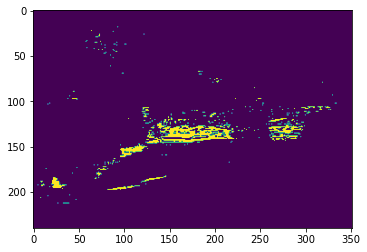

In [27]:
plt.imshow(thr[10])

In [ ]:
#################################

In [42]:
rgb_mix1_sel_bgr = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/Selective/rgb_mix1_sel_bgr.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
thermal_mix1_sel_bgr = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/Selective/thermal_mix1_sel_bgr.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]

In [43]:
print([rgb_mix1_sel_bgr.shape, rgb_mix1_sync.shape])

[(885, 240, 352), (885, 240, 352)]


In [44]:
dif = np.zeros(shape=rgb_mix1_sel_bgr.shape)
thr = np.zeros(shape=rgb_mix1_sel_bgr.shape)
c = np.zeros(shape=rgb_mix1_sel_bgr.shape[0])

for k in range(rgb_mix1_sel_bgr.shape[0]):    
    dif[k] = rgb_mix1_sync[k]-rgb_mix1_sel_bgr[k]
    dif[k][np.where(dif[k]>235)]=0
    c[k],thr[k] = cv2.threshold(dif[k],100,255,cv2.THRESH_BINARY)
del c

In [45]:
skvideo.io.vwrite('rgb_diff_bgr.mp4', thr)

In [46]:
dif = np.zeros(shape=thermal_mix1_sel_bgr.shape)
thr = np.zeros(shape=thermal_mix1_sel_bgr.shape)
c = np.zeros(shape=thermal_mix1_sel_bgr.shape[0])

for k in range(thermal_mix1_sel_bgr.shape[0]):    
    dif[k] = thermal_mix1_sync[k]-thermal_mix1_sel_bgr[k]
    dif[k][np.where(dif[k]>235)]=0
    c[k],thr[k] = cv2.threshold(dif[k],100,255,cv2.THRESH_BINARY)
del c

In [47]:
skvideo.io.vwrite('thermal_diff_bgr.mp4', thr)

In [ ]:
#############################Load background videos######################

In [244]:
rgb_mix1_gmg = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/GMG/rgb_mix1_gmg.mp4",outputdict={"-pix_fmt": "gray"})[:-1, :, :, 0]
thermal_mix1_gmg = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/GMG/thermal_mix1_gmg.mp4",outputdict={"-pix_fmt": "gray"})[:-1, :, :, 0]
rgb_mix1_mog = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/MOG/rgb_mix1_mog.mp4",outputdict={"-pix_fmt": "gray"})[:-1, :, :, 0]
thermal_mix1_mog = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/MOG/thermal_mix1_mog.mp4",outputdict={"-pix_fmt": "gray"})[:-1, :, :, 0]
rgb_mix1_mog2 = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/MOG2/rgb_mix1_mog2.mp4",outputdict={"-pix_fmt": "gray"})[:-1, :, :, 0]
thermal_mix1_mog2 = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/MOG2/thermal_mix1_mog2.mp4",outputdict={"-pix_fmt": "gray"})[:-1, :, :, 0]
rgb_mix1_gsoc = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/GSOC/rgb_mix1_gsoc.mp4",outputdict={"-pix_fmt": "gray"})[:-1, :, :, 0]
#rgb_diff = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/Selective/rgb_diff.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]

In [245]:
vid_bgr = np.zeros(shape=rgb_mix1_gmg.shape)
for k in range(rgb_mix1_gmg.shape[0]):
    vid_bgr[k] = rgb_mix1_gmg[k] + thermal_mix1_gmg[k] + rgb_mix1_mog[k] + thermal_mix1_mog[k] + rgb_mix1_mog2[k] + thermal_mix1_mog2[k] + rgb_mix1_gsoc[k] +rgb_diff[k]
    vid_bgr[k] = np.sign(cv2.threshold(vid_bgr[k],100,255,cv2.THRESH_BINARY)[1])
    vid_bgr[k] = np.where(vid_bgr[k]==1, 255, vid_bgr[k])

In [246]:
skvideo.io.vwrite("video_background.mp4", vid_bgr) 

In [247]:
###########Load Gas Detected Videos#########################

In [248]:
thermal_mix1_gsoc = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/GSOC/thermal_mix1_gsoc.mp4",outputdict={"-pix_fmt": "gray"})[:-1, :, :, 0]
#thermal_diff = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/Selective/thermal_diff.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]

In [249]:
vid_gas = np.zeros(shape=thermal_mix1_gsoc.shape)
for k in range(vid_gas.shape[0]):
    vid_gas[k] = thermal_mix1_gsoc[k]
    vid_gas[k] = np.sign(cv2.threshold(vid_gas[k],100,255,cv2.THRESH_BINARY)[1])
    vid_gas[k] = np.where(vid_gas[k]==1, 255, vid_gas[k])

In [250]:
skvideo.io.vwrite("video_gas.mp4", vid_gas) 

In [207]:
###################Extract Gas from Background Video################

In [251]:
gas_detect = np.zeros(shape=vid_gas.shape)
for k in range(vid_gas.shape[0]):
    gas_detect[k] = vid_gas[k] - vid_bgr[k]
    gas_detect[k] = np.where(gas_detect[k]==-255, 0, gas_detect[k])

In [252]:
skvideo.io.vwrite("gas_detect.mp4", gas_detect)

In [ ]:
######################################################################

In [272]:
thermal_mix1_gsoc = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/CNT/thermal_mix1_cnt.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
rgb_mix1_gsoc = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/CNT/rgb_mix1_cnt.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]

In [241]:
for k in range(thermal_mix1.shape[0]):
    thermal_mix1_gsoc[k] = np.sign(cv2.threshold(thermal_mix1[k],100,255,cv2.THRESH_BINARY)[1])
    thermal_mix1_gsoc[k] = np.where(thermal_mix1_gsoc[k]==1, 255, thermal_mix1_gsoc[k])
    
    rgb_mix1_gsoc[k] = np.sign(cv2.threshold(rgb_mix1_gsoc[k],100,255,cv2.THRESH_BINARY)[1])
    rgb_mix1_gsoc[k] = np.where(rgb_mix1_gsoc[k]==1, 255, rgb_mix1_gsoc[k])

In [242]:
gas_detect = np.zeros(shape=thermal_mix1_gsoc.shape)
for k in range(thermal_mix1_gsoc.shape[0]):
    gas_detect[k] = thermal_mix1_gsoc[k] - rgb_mix1_gsoc[k]
    gas_detect[k] = np.where(gas_detect[k]==-255, 0, gas_detect[k])

In [243]:
skvideo.io.vwrite("./CNT/gas_detect_cnt.mp4", gas_detect)